<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D0%B2%20Python/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F%20%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8/%D0%94%D0%97_%D0%9A%D0%BE%D0%BD%D0%B4%D1%80%D0%B0%D1%82%D1%8C%D0%B5%D0%B2_STPY-48_%D0%BA%20%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B8%20%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Базовые понятия статистики"

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.

### Задание 1. Загрузка данных

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names), загрузить его и оставить 8 столбцов для дальнейшего изучения: `surgery?`, `Age`, `rectal temperature`, `pulse`, `respiratory rate`, `temperature of extremities`, `pain`, `outcome`.

### Задание 2. Первичное изучение данных

Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.


### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

### 1. Загрузка данных

In [51]:
# Импорт библиотеки Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла "horse_data.csv" с указанием, что в файле нет заголовков столбцов (header=None)
# И указанием, что знак "?" следует интерпретировать как пропущенное значение (наличие пропущенных значений обозначено в данных именно знаком "?")
# Используя параметр usecols, указываем список индексов столбцов, которые нужно загрузить (в данном случае это столбцы с индексами 0, 1, 3, 4, 5, 6, 10 и 22)
# И задаем названия столбцов с помощью параметра names
data = pd.read_csv('horse_data.csv',
                   header=None,
                   usecols=[0, 1, 3, 4, 5, 6, 10, 22],
                   names=['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome'],
                   na_values=['?'])


In [52]:
data
# Смотроим наш рабочий DataFrame (есть пустые значения)

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,NaN,120.0,70.0,4.0,2.0,3.0
296,2.0,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1.0,1,37.5,72.0,30.0,4.0,4.0,2.0
298,1.0,1,36.5,100.0,24.0,3.0,3.0,1.0


## Первичное изучение данных

### Анализ категориальных столбцов

Столбцы `surgery?`, `Age`, `temperature of extremities`, `pain`, `outcome` категориальные.

Для них найдем моды, выполним подсчет количества значений каждой категории, вычисление доли каждой категории, построение круговой диаграммы, а также проверку соответствия уникальных значений категориям, описанным в описании данных.

In [53]:
# Нахождение моды (наиболее часто встречающегося значения) для столбца 'surgery?'
surgery_mode = data['surgery?'].mode()[0]
print(f"Mode for 'surgery?': {surgery_mode}")

# Нахождение моды для столбца 'Age'
age_mode = data['Age'].mode()[0]
print(f"Mode for 'Age': {age_mode}")

# Нахождение моды для столбца 'temperature of extremities'
extremities_mode = data['temperature of extremities'].mode()[0]
print(f"Mode for 'temperature of extremities': {extremities_mode}")

# Нахождение моды для столбца 'pain'
pain_mode = data['pain'].mode()[0]
print(f"Mode for 'pain': {pain_mode}")

# Нахождение моды для столбца 'outcome'
outcome_mode = data['outcome'].mode()[0]
print(f"Mode for 'outcome': {outcome_mode}")

Mode for 'surgery?': 1.0
Mode for 'Age': 1
Mode for 'temperature of extremities': 3.0
Mode for 'pain': 3.0
Mode for 'outcome': 1.0


In [54]:
# Проверка уникальных значений категорий и их соответствие описанию данных
surgery_categories = data['surgery?'].unique()
print(f"Unique categories for 'surgery?': {surgery_categories}")

age_categories = data['Age'].unique()
print(f"Unique categories for 'Age': {age_categories}")

extremities_categories = data['temperature of extremities'].unique()
print(f"Unique categories for 'temperature of extremities': {extremities_categories}")

pain_categories = data['pain'].unique()
print(f"Unique categories for 'pain': {pain_categories}")

outcome_categories = data['outcome'].unique()
print(f"Unique categories for 'outcome': {outcome_categories}")

Unique categories for 'surgery?': [ 2.  1. nan]
Unique categories for 'Age': [1 9]
Unique categories for 'temperature of extremities': [ 3. nan  1.  4.  2.]
Unique categories for 'pain': [ 5.  3.  2. nan  4.  1.]
Unique categories for 'outcome': [ 2.  3.  1. nan]


In [55]:
# Подсчет количества значений каждой категории
category_counts_age = data["Age"].value_counts()
category_counts_temp = data["temperature of extremities"].value_counts()
category_counts_pain = data["pain"].value_counts()
category_counts_outcome = data["outcome"].value_counts()
category_counts_surgery = data["surgery?"].value_counts()

# Вывод результатов на печать
print("Результаты подсчета количества значений каждой категории:")
print("-" * 30)
print("Столбец 'Age':")
print(category_counts_age)
print("-" * 30)
print("Столбец 'temperature of extremities':")
print(category_counts_temp)
print("-" * 30)
print("Столбец 'pain':")
print(category_counts_pain)
print("-" * 30)
print("Столбец 'outcome':")
print(category_counts_outcome)
print("-" * 30)
print("Столбец 'surgery?':")
print(category_counts_surgery)

Результаты подсчета количества значений каждой категории:
------------------------------
Столбец 'Age':
1    276
9     24
Name: Age, dtype: int64
------------------------------
Столбец 'temperature of extremities':
3.0    109
1.0     78
2.0     30
4.0     27
Name: temperature of extremities, dtype: int64
------------------------------
Столбец 'pain':
3.0    67
2.0    59
5.0    42
4.0    39
1.0    38
Name: pain, dtype: int64
------------------------------
Столбец 'outcome':
1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64
------------------------------
Столбец 'surgery?':
1.0    180
2.0    119
Name: surgery?, dtype: int64


### Анализ непрерывных величин

Столбцы rectal temperature, pulse, respiratory rate являются непрерывными величинами. Для них найдем базовые статистики, применим межквартильный размах для поиска выбросов. Построить графики плотности распределения.

In [56]:
# Нахождение базовых статистик для столбца 'rectal temperature'
rectal_temp_stats = data['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature':\n{rectal_temp_stats}")

Statistics for 'rectal temperature':
count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64


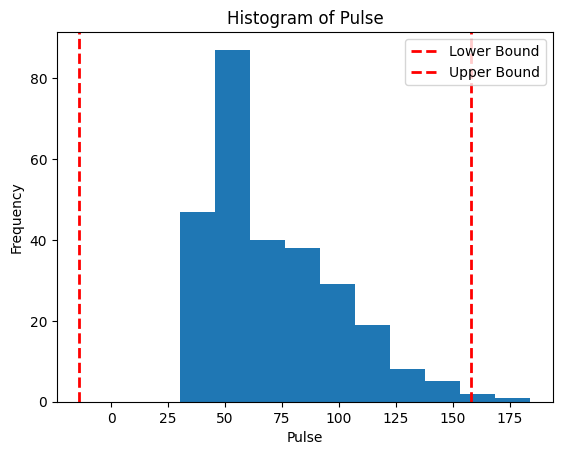

In [74]:
import matplotlib.pyplot as plt

# Получение значений pulse без NaN
pulse_values = data['pulse'].dropna()

# Создание гистограммы
plt.hist(pulse_values, bins=10)

# Расчет границ выбросов
mean = pulse_values.mean()
std = pulse_values.std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

# Отображение границ выбросов
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label='Upper Bound')

# Назначение осей и названия
plt.xlabel('Pulse')
plt.ylabel('Frequency')
plt.title('Histogram of Pulse')
plt.legend()

# Отображение гистограммы
plt.show()

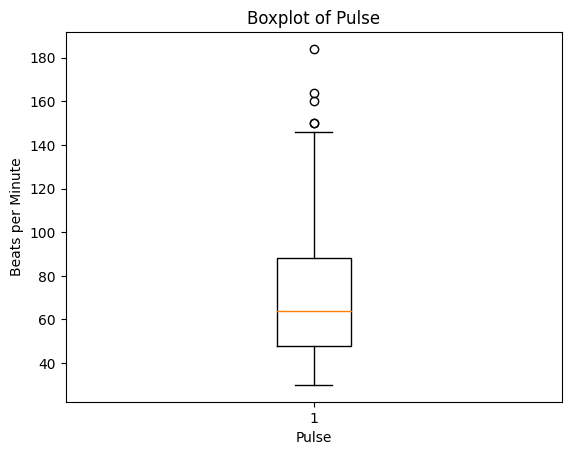

In [75]:
import matplotlib.pyplot as plt

# Удаление строк с пропущенными значениями в столбце 'pulse'
data_cleaned = data.dropna(subset=['pulse'])

# Создание боксплота
plt.boxplot(data_cleaned['pulse'])

# Назначение осей и названия
plt.xlabel('Pulse')
plt.ylabel('Beats per Minute')
plt.title('Boxplot of Pulse')

# Отображение боксплота
plt.show()

Исходя из статистики для столбца `rectal temperature`, можно сделать следующий анализ распределения данных:

- В данных присутствует `240` наблюдений.
- Стандартное отклонение (`std`) равно `0.732289`, что указывает на небольшой разброс значений относительно среднего значения.

Исходя из этих данных, можно сказать, что большинство наблюдений имеют ректальную температуру в диапазоне от `37.8` до `38.5` градусов Цельсия. Среднее значение (`38.167917`) близко к медианному значению (`38.2`), что указывает на небольшую асимметрию в распределении.



In [58]:
# Применение межквартильного размаха (IQR) для поиска выбросов в столбце 'rectal temperature'
Q1 = data['rectal temperature'].quantile(0.25)
Q3 = data['rectal temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_rectal_temp = data[(data['rectal temperature'] < lower_bound) | (data['rectal temperature'] > upper_bound)]
outliers_rectal_temp

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
20,1.0,1,39.9,72.0,60.0,1.0,5.0,1.0
44,1.0,1,35.4,140.0,24.0,3.0,4.0,3.0
54,2.0,1,40.3,114.0,36.0,3.0,2.0,3.0
75,1.0,9,39.7,100.0,NaN,3.0,2.0,3.0
80,1.0,1,36.4,98.0,35.0,3.0,4.0,2.0
91,2.0,1,40.3,114.0,36.0,3.0,2.0,2.0
99,2.0,1,39.6,108.0,51.0,3.0,2.0,1.0
118,1.0,1,36.5,78.0,30.0,1.0,5.0,1.0
141,2.0,1,36.0,42.0,30.0,NaN,NaN,2.0
238,2.0,1,36.1,88.0,NaN,3.0,3.0,3.0


In [59]:
# Нахождение базовых статистик для столбца 'rectal temperature'
rectal_temp_stats = data['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature':\n{rectal_temp_stats}")
# Нахождение базовых статистик для столбца 'rectal temperature' без учета найденных выбросов
rectal_temp_no_outliers = data[~data.index.isin(outliers_rectal_temp.index)]['rectal temperature'].describe()
print(f"Statistics for 'rectal temperature' without outliers:\n{rectal_temp_no_outliers}")

Statistics for 'rectal temperature':
count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal temperature, dtype: float64
Statistics for 'rectal temperature' without outliers:
count    226.000000
mean      38.169027
std        0.571949
min       36.800000
25%       37.800000
50%       38.200000
75%       38.500000
max       39.500000
Name: rectal temperature, dtype: float64


На основе базовых статистик, можно сделать вывод, что выбросы в столбце `rectal temperature` не сильно искажают данные.

Среднее значение и медиана температуры практически не изменяются после исключения выбросов. Однако, стандартное отклонение снижается, что указывает, что разброс значений становится меньше.

Минимальное и максимальное значения температуры также изменяются в пределах допустимого диапазона, не приводя к значительным изменениям.

Поэтому, можно сказать, что выбросы не сильно искажают данные в столбце `rectal temperature`.

In [60]:
# Нахождение базовых статистик для столбца 'pulse'
pulse_stats = data['pulse'].describe()
print(f"Statistics for 'pulse':\n{pulse_stats}")

Statistics for 'pulse':
count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64


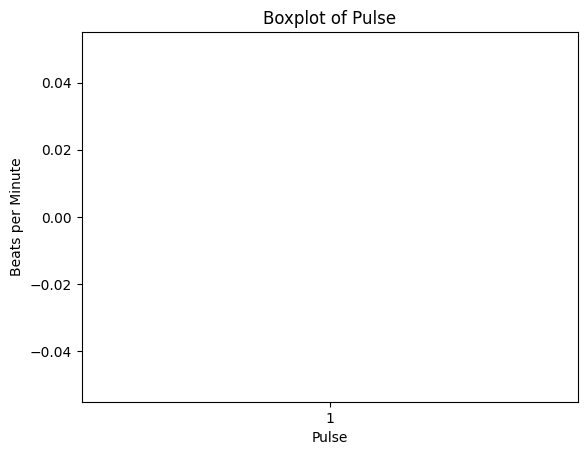

In [61]:
import matplotlib.pyplot as plt

# Создание боксплота
plt.boxplot(data['pulse'])

# Назначение осей и названия
plt.xlabel('Pulse')
plt.ylabel('Beats per Minute')
plt.title('Boxplot of Pulse')

# Отображение боксплота
plt.show()

Исходя из статистики для столбца `pulse`, можно сделать следующий анализ распределения данных:

- В данных присутствует `276` наблюдений.
- Среднее значение (`mean`) пульса составляет `71.913043`.
- Стандартное отклонение (`std`) равно `28.630557`, что указывает на разброс значений относительно среднего значения.

Исходя из этих данных, можно предположить, что распределение пульса скорее всего будет скошено вправо (положительную асимметрию), так как медианное значение (`64`) меньше среднего значения (`71.913043`) и максимальное значение (`184`) находится далеко от среднего.



In [62]:
# Применение правила трех сигм для поиска выбросов в столбце 'pulse'
mean = data['pulse'].mean()
std = data['pulse'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers_pulse = data[(data['pulse'] < lower_bound) | (data['pulse'] > upper_bound)]
outliers_pulse

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
55,1.0,9,38.6,160.0,20.0,3.0,3.0,2.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0


In [63]:
# Нахождение базовых статистик для столбца 'pulse'
pulse_stats = data['pulse'].describe()
print(f"Statistics for 'pulse':\n{pulse_stats}")
# Нахождение базовых статистик для столбца 'pulse' без учета выбросов
pulse_no_outliers = data[~data.index.isin(outliers_pulse.index)]['pulse'].describe()
print(f"Statistics for 'pulse' without outliers:\n{pulse_no_outliers}")

Statistics for 'pulse':
count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64
Statistics for 'pulse' without outliers:
count    273.000000
mean      70.842491
std       26.864600
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      150.000000
Name: pulse, dtype: float64


Из этих результатов можно сделать вывод, что исключение выбросов из столбца `pulse` привело к некоторому снижению среднего значения пульса и стандартного отклонения, что указывает на уменьшение разброса значений. Однако, нижний квартиль, медиана и верхний квартиль остаются на прежних уровнях, что может указывать на то, что выбросы не оказывают сильного влияния на эти показатели.

In [64]:
# Нахождение базовых статистик для столбца 'respiratory rate'
resp_rate_stats = data['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate':\n{resp_rate_stats}")

Statistics for 'respiratory rate':
count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64


Исходя из  статистики для столбца `respiratory rate`, можно сделать следующий анализ распределения данных:

- В данных присутствует 242 наблюдения.
- Стандартное отклонение (`std`) равно `17.642231`, что указывает на достаточно большой разброс значений относительно среднего значения.

Исходя из этих данных, можно сказать, что большинство наблюдений имеют частоту дыхания в диапазоне от `18.5` до `36`. Среднее значение (`30.417355`) близко к медианному значению (`24.5`), что указывает на скошенность вправо (положительную асимметрию) в распределении. Учитывая также максимальное значение (`96`), можно сказать, что в данных присутствуют выбросы или аномальные значения, которые могут исказить распределение данных.



In [65]:
# Применение правила трех сигм для поиска выбросов в столбце 'respiratory rate'
mean = data['respiratory rate'].mean()
std = data['respiratory rate'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
outliers_resp_rate = data[(data['respiratory rate'] < lower_bound) | (data['respiratory rate'] > upper_bound)]
outliers_resp_rate

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
39,1.0,9,39.2,146.0,96.0,NaN,NaN,2.0
106,1.0,1,38.3,52.0,96.0,NaN,NaN,1.0
186,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0
244,1.0,9,38.2,124.0,88.0,1.0,2.0,1.0
255,1.0,9,38.8,184.0,84.0,1.0,4.0,2.0
269,1.0,1,39.3,64.0,90.0,2.0,NaN,1.0


In [66]:
# Нахождение базовых статистик для столбца 'respiratory rate'
resp_rate_stats = data['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate':\n{resp_rate_stats}")
# Нахождение базовых статистик для столбца 'respiratory rate' без учета выбросов
resp_rate_no_outliers = data[~data.index.isin(outliers_resp_rate.index)]['respiratory rate'].describe()
print(f"Statistics for 'respiratory rate' without outliers:\n{resp_rate_no_outliers}")

Statistics for 'respiratory rate':
count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory rate, dtype: float64
Statistics for 'respiratory rate' without outliers:
count    235.000000
mean      28.651064
std       14.546916
min        8.000000
25%       18.000000
50%       24.000000
75%       36.000000
max       80.000000
Name: respiratory rate, dtype: float64


Из этих результатов можно сделать вывод, что исключение выбросов из столбца `respiratory rate` привело к некоторому снижению среднего значения частоты дыхания и стандартного отклонения, что указывает на уменьшение разброса значений. Однако, нижний квартиль, медиана и верхний квартиль остаются на прежних уровнях, что может указывать на то, что выбросы не оказывают сильного влияния на эти показатели.

In [67]:
# Выводим базовые статистики

# Среднее значение (это видно по среднему 71 и по моде 64 )
# частоты пульса в ударах в минуту намного выше нормы (30-40 ударов как в описании базы данных)

# Среднее значение (это видно по среднему 30 и по моде 24 )
# частоты дыхания в минуту намного выше нормы (8-10 вдохов как в описании базы данных)

#Так как значения частоты пульса и дыхания которые выше нормы составляют основу наших данных
# мы не можем их игноировать
# Можно предположить, дыхание и пульс могут значительно отклоняться от нормы под влиянием стресса и боли.

# Видно, что максиматьное значение возраста 9.
# Bз описания базы мы знаем, что значение должно быть только 1 (взрослая) или 2 (6-месяцев)
# Предположим, что это неправильное распознавание значения 2, т.к. кроме значений 1 и 9 у нас нет (2-не встречается, а должна)

data.describe()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [68]:
(data.isna().mean() * 100).round(2)
# Видим, что процент пустых ячеек не привишает 20%. Это относительно не большой процент.

surgery?                       0.33
Age                            0.00
rectal temperature            20.00
pulse                          8.00
respiratory rate              19.33
temperature of extremities    18.67
pain                          18.33
outcome                        0.33
dtype: float64

Создается новый объект DataFrame `new_data`, в котором исключаются записи, где `pulse` не находится в диапазоне от 30 до 40.

В объекте DataFrame `new_data` исключаются записи, где `respiratory rate` не находится в диапазоне от 8 до 10.

В объекте DataFrame `new_data` исключаются записи, где `Age` находится вне диапазона от 1 до 2.

In [69]:
new_data = data.drop(data[(data['pulse'] < 30) | (data['pulse'] > 40)].index)
new_data = new_data.drop(new_data[(new_data['respiratory rate'] < 8) | (new_data['respiratory rate'] > 10)].index)
new_data = new_data.drop(new_data[(new_data['Age'] < 1) | (new_data['Age'] > 2)].index)
new_data
# Видно сразу, что много пустых значений

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
5,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0
28,1.0,1,NaN,NaN,NaN,NaN,NaN,2.0
52,2.0,1,NaN,NaN,NaN,1.0,1.0,1.0
56,1.0,1,NaN,NaN,NaN,NaN,NaN,1.0
78,1.0,1,NaN,NaN,NaN,3.0,5.0,2.0
81,1.0,1,37.3,40.0,NaN,NaN,2.0,1.0
93,2.0,1,NaN,NaN,NaN,3.0,5.0,2.0
112,1.0,1,NaN,40.0,NaN,2.0,1.0,1.0
117,2.0,1,39.5,NaN,NaN,3.0,3.0,3.0
126,1.0,1,38.7,NaN,NaN,3.0,5.0,1.0


In [70]:
new_data.info()
# Видим, что значений (выбросов), которые не находятся в нормальных
# (согласно описанию базы данных) диапозонах гораздо больше, чем в нормальных диапозонах.
# Из 300 строчек осталось только 20.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 5 to 288
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    20 non-null     float64
 1   Age                         20 non-null     int64  
 2   rectal temperature          6 non-null      float64
 3   pulse                       4 non-null      float64
 4   respiratory rate            2 non-null      float64
 5   temperature of extremities  11 non-null     float64
 6   pain                        14 non-null     float64
 7   outcome                     20 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 1.4 KB


In [71]:
(new_data.isna().mean() * 100).round(2)
# И эти 20 строк имеют очень много пропусков.

surgery?                       0.0
Age                            0.0
rectal temperature            70.0
pulse                         80.0
respiratory rate              90.0
temperature of extremities    45.0
pain                          30.0
outcome                        0.0
dtype: float64

In [72]:
# Пропусков больше чем заполненых значений.
# Заполнение пропусков средними значениями будет не корректно.
# Найдем строки где заполнены 7 значений из 8
# Видим, что только одна строчка из 300 корректро заполнена и не имеет пропусков
new_data = new_data.dropna(thresh=7)
new_data

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
190,1.0,1,37.1,40.0,8.0,NaN,3.0,1.0
203,2.0,1,37.2,36.0,9.0,1.0,2.0,1.0


`new_data = new_data.dropna(thresh=7)` - это код, который удаляет строки из DataFrame `new_data`, если они содержат менее 7 непустых значений.

Метод `dropna()` используется для удаления нулевых или отсутствующих значений в объекте DataFrame. Параметр `thresh` в методе `dropna()` задает минимальное количество непустых значений, которое должно присутствовать в строке, чтобы она не была удалена. Значение `7` означает, что строки, содержащие менее 7 непустых значений, будут удалены из DataFrame `new_data`

In [73]:
new_data = new_data.copy()
new_data.loc[:, 'temperature of extremities'] = new_data.loc[:, 'temperature of extremities'].fillna(1)
new_data
# Из описания бызы данных мы знаем, что темперетура конечностей коррелирует с ректальной температурой
# Ректальныя температура у нас нормальнач так, что подставляем значение 1-нормальная температура конечностей.
# Теперь мы имеем дата фрейм который очистили от выбросов и заполнеными пустыми значениями.
# Только что нам с ним делать не понятно.
# Понятно только одно - Работать с такими данными нельзя!

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
190,1.0,1,37.1,40.0,8.0,1.0,3.0,1.0
203,2.0,1,37.2,36.0,9.0,1.0,2.0,1.0


`new_data = new_data.copy()` - Этот код создает копию DataFrame `new_data` и присваивает эту копию новой переменной `new_data`. Копия создается для того, чтобы избежать любых потенциальных проблем с ссылками или изменениями данных в исходном DataFrame.

`new_data.loc[:, 'temperature of extremities']` - Это обращение к столбцу с именем 'temperature of extremities' в DataFrame `new_data`. `loc` - это метод, используемый для доступа и манипуляций с данными в DataFrame. `:` указывает на то, что мы хотим выбрать все строки в указанном столбце.

`.fillna(1)` - Этот метод заполняет отсутствующие значения (NaN) в выбранном столбце 'temperature of extremities' значением 1. Метод `.fillna()` заменяет отсутствующие значения указанным значением. В данном случае, все NaN значения в столбце 'temperature of extremities' будут заменены на 1.

# Вывод

Анализируя представленные данные и описание базы данных, можно сделать вывод, что у нас есть несоответствия и некорректные значения в исходных данных. В частности, средние значения для частоты пульса и дыхания в данных значительно превышают нормальные значения.

Согласно описанию базы данных, ничего не говорится о таких высоких значениях пульса, за исключением ситуаций, связанных с циркуляторным шоком. Однако, в данных присутствует значительное количество таких "выбросов", что наводит на мысль о некорректности или ошибочности данных.

Описанием базы данных уточняется, что данные относятся к больным лошадям, и повышенная частота сердечных сокращений может быть обусловлена наличием различных негативных симптомов. Однако, поскольку описание не упоминает о том, что такие значения пульса могут часто встречаться или что это является обычным для больных лошадей, можно сделать вывод о некорректности данных.

Таким образом, результаты анализа указывают на необходимость проверки и корректировки данных, чтобы исключить выбросы и некорректные значения частоты пульса и дыхания, которые могут исказить интерпретацию и анализ результатов.



#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.